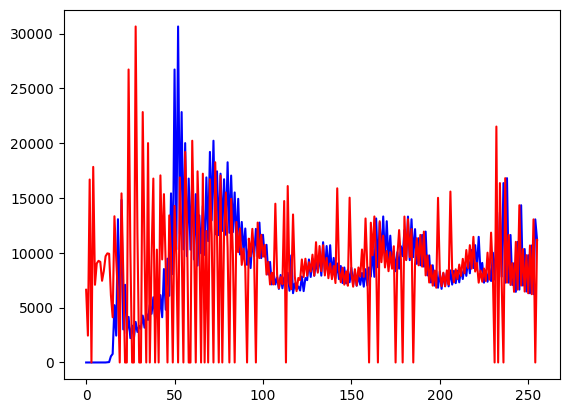

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    # Hitung histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Hitung CDF
    cdf = hist.cumsum()

    # Normalisasi CDF
    cdf_normalized = cdf * 255 / cdf.max()

    # Mapping nilai piksel
    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    img_equalized = img_equalized.reshape(img.shape)

    # Hitung histogram baru
    hist_equalized, _ = np.histogram(img_equalized.flatten(), 256, [0, 256])

    return img_equalized, hist, hist_equalized

# Baca gambar
img = cv2.imread('bayi.jpg', 0)  # Baca gambar grayscale

# Lakukan histogram equalization
img_equalized, hist, hist_equalized = histogram_equalization(img)

# Tampilkan gambar asli dan hasil equalization
cv2.imshow('Original Image', img)
cv2.imshow('Equalized Image', img_equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Plot histogram
plt.plot(hist, color='b')
plt.plot(hist_equalized, color='r')
plt.show()